<a href="https://colab.research.google.com/github/hc0rd31r0/Bootcamp-DataScience-modulo1/blob/main/Bootcamp_Datascience_aula5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Caderno de exploração dos dados do DATASUS, processados a partir de 2008.



---

### **Carga dos dados**

---


In [1]:
# importando as bibliotecas necessárias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# configurações default
pd.options.display.float_format = "{:.2f}".format

# Comentei essa linha para aparecer o grid no #Desafio 01
sns.set()



---


*Informações obtidas do site TABNET*

Localização: Informações de Saúde TABNET -> Assistência à Saúde -> Dados Consolidados AIH (RD), por local de internação, a partir de 2008 -> Brasil por região e unidade de Federação
Filtros
*   **Linha**: Unidade da Federação
*   **Coluna**: Ano Mês Atendimento
*   **Conteúdo**: Valor Total
*   **Período**: de: Jan-2008 até: Mar-2021

**Nome do arquivo**: /content/drive/MyDrive/databases/A102533189_28_143_208-A.csv

---



In [2]:
dados = pd.read_csv("/content/drive/MyDrive/databases/A102533189_28_143_208-A.csv", engine='python', encoding="ISO-8859-1", skiprows=3, sep=";", skipfooter=12, thousands=".", decimal=",")

In [3]:
# tolist() para permitir que o index seja mutável 
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0,"Unidade da Federação")

In [4]:
usaveis = dados[colunas_usaveis]
# a Unidade da Federação agora é meu índice
usaveis = usaveis.set_index("Unidade da Federação")
usaveis.head()

,2007/Ago,2007/Set,2007/Out,2007/Nov,2007/Dez,2008/Jan,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,...,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar,Total
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11 Rondônia,4209.37,16397.03,133645.19,346912.84,711758.31,1829559.71,1940792.63,1955721.68,2143353.81,2280382.58,2624542.97,2973421.02,2938286.29,2843930.91,2878153.20,2780022.62,2651804.89,3147566.24,3082108.12,4190355.33,4040251.62,3946423.71,3372377.96,3720608.86,3787323.26,3679369.94,3866146.99,3667808.60,3633471.79,3812315.59,3911776.03,4663060.75,4524544.88,4778755.26,4369733.23,4632439.12,4464307.47,4668642.02,4490368.23,4423840.08,...,8457455.71,7766983.20,8858845.57,8407076.44,9492938.92,8206195.92,9011612.58,9124967.84,8406732.72,8411360.02,8651081.66,8193425.99,8388269.45,8645315.78,9050329.13,9211262.51,9490545.02,8600886.20,8919190.86,8909111.89,8409386.09,8924348.41,8948605.66,8660753.05,8327665.97,8431334.62,7251287.20,7490440.60,8957706.45,10993332.84,10479989.36,11433467.56,8876900.39,8167253.19,8759013.71,9003402.23,8414690.60,6039419.59,4732441.04,996411254.68
12 Acre,10470.07,14001.71,86200.85,301323.68,769612.36,1731744.62,1743978.66,2057439.02,2057829.69,2226577.93,2112576.82,2029128.01,1886871.84,2084884.80,2230838.45,2122013.12,2196651.69,2152239.30,2086775.61,2476364.26,2396887.63,2610261.80,2174098.10,2051885.16,1714707.91,1341532.34,2288458.90,2462712.79,2254900.20,2381535.93,2079981.05,2564837.77,2588318.06,2538525.67,2319786.41,2279156.60,2454599.37,2578923.75,2625443.29,2512995.15,...,2968168.75,2769797.39,3057631.96,2874965.31,3175575.17,3060903.21,3253011.61,3040645.05,2926179.27,3126120.64,2473454.85,2277493.49,2594347.32,2234388.36,2473008.49,2979764.77,3070533.95,3249052.69,3567538.64,2981072.98,2998860.31,3293378.97,3174249.43,2959569.09,3276790.55,2985763.71,2939675.20,2672857.33,2940827.86,3914823.86,4053085.41,3658265.59,3470409.45,3267918.69,3393958.27,3711660.71,3005561.16,2272733.90,1137341.65,450048530.47
13 Amazonas,35752.72,45570.64,416012.30,2020381.79,5949408.99,11419210.08,7934652.10,8641517.13,8531576.49,9079902.15,8646295.77,8755806.50,8331763.97,8148089.92,7681661.02,7761445.21,7764782.66,8607222.74,8385962.92,9207129.28,8160517.20,8562322.43,9484998.71,9465068.52,9267006.58,9092823.55,9218407.34,8674068.02,8365788.46,9386945.03,8373048.81,10321150.01,9990164.13,9767161.23,9151838.50,9140196.88,9437224.41,9742680.49,9996686.44,9532878.27,...,14549450.86,12753555.36,14749409.47,14577930.81,15381061.96,14653650.77,15544595.79,16374961.41,15343340.93,16249963.61,14255408.82,14274053.94,15358914.00,14100074.56,16103971.89,16154491.82,16529976.06,15509984.83,16642220.71,16493719.52,15351607.47,16339427.95,14821977.50,14965815.90,15982353.42,15166470.82,14815958.58,16379386.07,19625325.21,18433057.47,19303743.16,18687233.58,18628627.49,18728251.20,20451573.77,21546059.48,24439059.57,13679358.06,6799060.80,1917247936.05
14 Roraima,4785.91,11858.63,43852.67,369328.51,470676.43,808448.39,771687.83,876091.18,896952.53,1027288.73,938293.54,1004340.44,1045291.11,1003740.89,1055063.43,1223200.73,1236529.18,1186281.36,1106225.18,1422690.18,1377859.19,1363883.01,1346660.89,1371019.37,1529696.18,1573418.68,1517391.92,1597811.24,1536941.82,1617781.76,1452295.35,1817004.16,1715762.10,1933733.03,1849065.95,1877204.62,2046063.98,1939488.67,1757675.71,1528245.34,...,2740952.07,2478349.44,

In [5]:
# vamos ordenar nossos dados pelo Total
ordenado_por_total = usaveis.sort_values("Total", ascending=False)

# vamos tirar a coluna de Total para não afetar nossos gráficos
ordenado_por_total = ordenado_por_total.drop("Total",axis=1)

# vamos retirar o ano de 2007 e Janeiro/2008
# data de implantação dos dados e consequentemente data padrão de cadastro
colunas_interessantes = ordenado_por_total.columns[6:]
ordenado_por_total = ordenado_por_total[colunas_interessantes]

# trabalhar com os valores na casa dos milhões
ordenado_por_total_milhoes = ordenado_por_total / 1000000

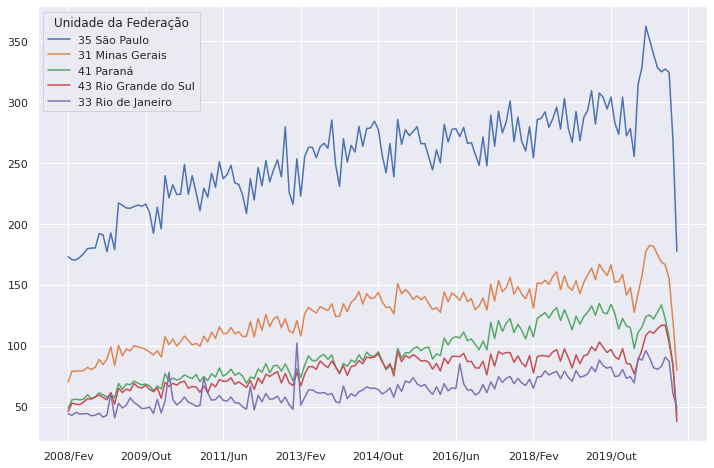

In [6]:
ordenado_por_total_milhoes.head(5).T.plot(figsize=(12,8))
plt.show()

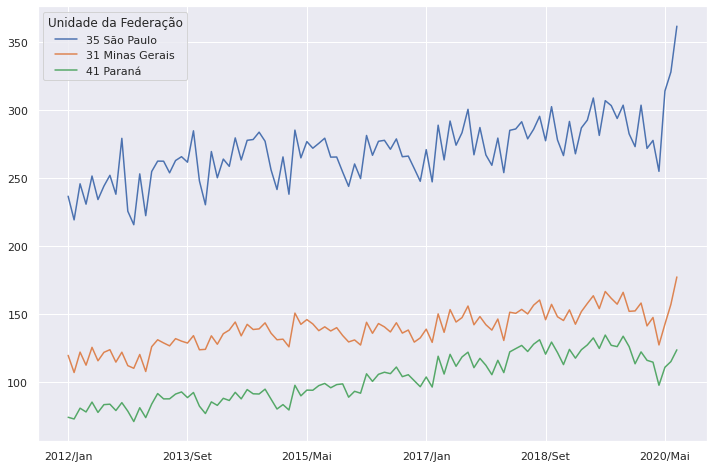

In [7]:
# vamos separar alguns meses para análise

meses_filtrados = ordenado_por_total_milhoes.columns[47:150]
ordenado_por_total_milhoes[meses_filtrados].head(3).T.plot(figsize=(12,8))
plt.show()

***ATENÇÃO!!!***
Atente ao eixo (y)! Ele não começa em 0 (zero) mas em 50 (cinquenta), cuidado, visualmente dá a impressão que São Paulo gastou 4 vezes mais que o Paraná em 2013/Set.

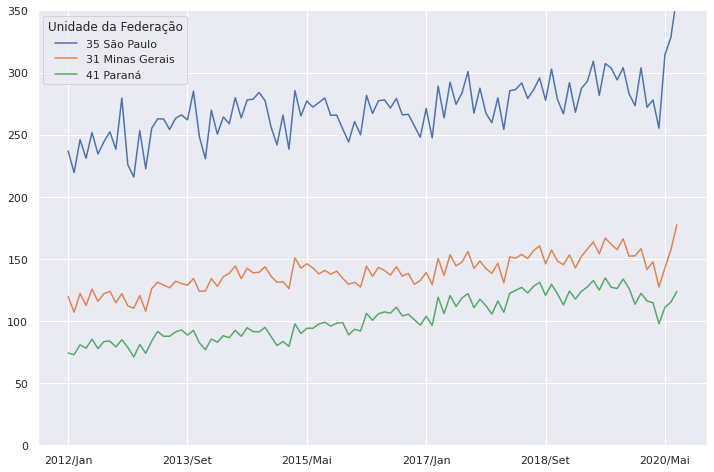

In [8]:
ordenado_por_total_milhoes[meses_filtrados].head(3).T.plot(figsize=(12,8))

# Utilizando o ylim() para controlar o "corte" utilizado no eixo y
plt.ylim(0, 350)
plt.show()



---

# **Aula 5** - Manipulação e interpretação de gráficos

---



In [9]:
ordenado_por_total_milhoes.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,172.96,170.56,170.34,172.46,175.49,179.57,180.01,180.15,191.86,190.93,177.09,192.41,178.64,217.01,215.13,212.91,212.72,214.08,215.27,214.25,216.12,209.18,192.16,213.51,195.79,239.41,221.20,231.92,224.04,224.16,248.76,224.12,239.35,225.64,210.71,229.15,221.66,241.45,229.92,250.82,...,259.64,279.65,254.22,285.35,286.37,291.68,279.10,286.15,295.67,277.69,302.77,278.27,266.77,291.89,268.08,287.15,292.87,309.14,281.62,307.20,303.58,294.08,303.87,282.79,273.36,303.87,272.05,277.94,255.18,314.28,328.29,361.99,350.27,338.87,328.06,324.60,326.85,324.12,268.19,177.41
31 Minas Gerais,70.30,79.12,79.05,79.27,79.62,82.21,80.37,82.41,88.61,84.49,88.93,99.02,83.68,100.26,91.83,97.29,95.72,100.05,98.98,98.20,96.96,94.77,92.41,95.81,90.76,107.39,100.84,105.49,99.67,103.37,107.84,104.34,100.53,101.94,99.54,107.77,103.15,111.08,106.09,115.49,...,138.37,146.51,130.73,151.51,150.70,153.60,150.26,156.72,160.48,146.00,157.29,148.17,145.42,153.24,142.69,151.98,157.96,163.64,154.17,166.78,161.77,157.44,166.17,152.17,152.47,158.27,141.46,147.65,127.45,142.75,157.28,177.47,182.18,181.42,174.59,168.56,166.38,155.06,119.88,79.78
41 Paraná,48.86,55.61,56.12,55.57,56.09,59.80,56.70,58.09,61.37,59.67,57.82,60.38,57.24,69.07,64.05,68.69,67.93,70.96,69.23,67.85,68.56,67.16,63.09,66.90,64.50,77.14,70.76,73.46,71.84,73.01,76.15,74.24,73.04,76.36,70.52,74.71,71.31,76.91,74.23,81.71,...,105.56,116.13,107.08,122.33,124.73,127.08,122.62,127.99,131.26,120.65,129.53,121.81,112.98,124.16,117.72,123.91,127.46,132.61,124.87,134.71,127.17,126.20,133.87,126.22,113.57,122.33,116.13,114.78,97.78,111.01,115.20,123.86,125.09,121.77,127.51,133.44,122.15,106.95,83.13,43.48
43 Rio Grande do Sul,45.90,52.93,51.97,51.68,53.76,56.39,56.23,57.91,59.59,57.57,55.70,61.52,52.10,65.11,61.59,64.40,63.09,69.14,66.06,65.22,67.57,64.19,62.24,65.49,56.96,69.93,66.49,69.11,67.57,70.07,70.88,65.08,66.56,66.10,61.74,66.92,61.37,69.00,66.23,72.17,...,82.74,91.83,77.58,91.08,91.93,91.68,90.99,94.86,96.80,87.34,97.37,90.19,81.75,92.47,85.30,91.62,92.79,99.14,95.86,103.04,98.57,94.37,96.97,91.01,88.76,97.61,85.49,84.88,76.81,87.78,96.80,108.54,111.76,110.11,113.89,116.74,116.83,102.32,84.40,37.80
33 Rio de Janeiro,44.13,42.90,45.31,43.95,44.11,44.36,42.50,43.07,44.55,41.35,43.02,60.89,40.67,52.75,48.92,51.18,57.24,53.49,51.24,48.49,48.69,49.71,44.41,55.99,44.83,54.47,78.13,56.03,51.44,53.87,57.87,53.74,52.38,50.24,50.89,74.01,61.15,55.35,55.82,59.09,...,67.38,72.45,65.06,74.43,74.58,79.42,75.99,77.58,78.92,72.87,79.19,74.02,70.83,79.66,74.14,75.06,76.86,82.67,78.69,88.18,83.62,81.56,82.53,74.78,75.15,80.41,73.15,74.60,69.44,89.73,88.14,95.94,89.80,81.89,80.57,82.81,90.57,87.20,60.87,49.15


In [10]:
# o gasto do mês de Março de 2021 está muito abaixo da média, então para nossa análise utilizarei o mês de Dezembro de 2020.

mes_mais_recente = ordenado_por_total_milhoes.columns[-4]
mes_mais_recente

'2020/Dez'

In [11]:
gastos_do_mais_recente = ordenado_por_total_milhoes[mes_mais_recente]
gastos_do_mais_recente.head()

Unidade da Federação
35 São Paulo           326.85
31 Minas Gerais        166.38
41 Paraná              122.15
43 Rio Grande do Sul   116.83
33 Rio de Janeiro       90.57
Name: 2020/Dez, dtype: float64

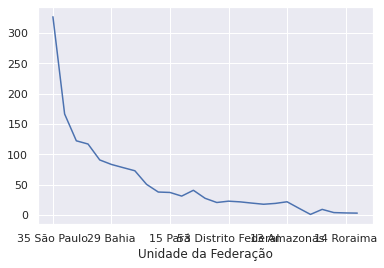

In [12]:
gastos_do_mais_recente.plot()

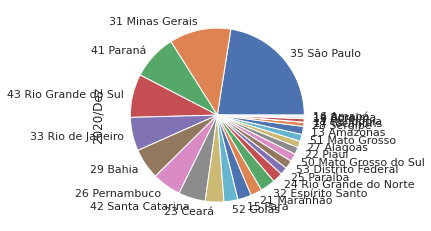

In [13]:
gastos_do_mais_recente.plot(kind='pie')

Horrores da pizza [atual]:

- legenda está horrível
- número de fatias inacreditável

Já estamos com uma vantagem:
- o gráfico veio ordenado (mas vamos acabar com essa vantagem)



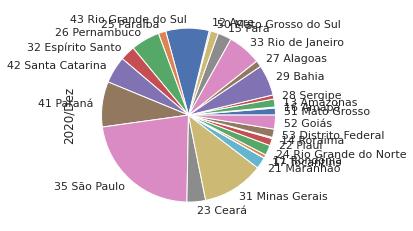

In [14]:
gastos_do_mais_recente.sample(frac=1).plot(kind='pie')

Horrores da pizza:

- legenda está horrível
- número de fatias inacreditável
- não dá para saber a ordem
- cores repetidas
- muito ruim para definir ordem
- péssimo para COMPARAR


In [15]:
# visualização simples por valor absoluto

gastos_do_mais_recente

Unidade da Federação
35 São Paulo             326.85
31 Minas Gerais          166.38
41 Paraná                122.15
43 Rio Grande do Sul     116.83
33 Rio de Janeiro         90.57
29 Bahia                  83.13
26 Pernambuco             77.88
42 Santa Catarina         72.72
23 Ceará                  50.27
52 Goiás                  37.61
15 Pará                   36.91
21 Maranhão               30.93
32 Espírito Santo         40.50
24 Rio Grande do Norte    27.28
25 Paraíba                20.36
53 Distrito Federal       22.55
50 Mato Grosso do Sul     21.39
22 Piauí                  19.35
27 Alagoas                17.46
51 Mato Grosso            18.85
13 Amazonas               21.55
28 Sergipe                11.00
17 Tocantins               0.69
11 Rondônia                9.00
12 Acre                    3.71
14 Roraima                 3.13
16 Amapá                   2.83
Name: 2020/Dez, dtype: float64

In [16]:
# comparação de gastos com o Rio de Janeiro sendo nosso 100%

gastos_do_mais_recente / gastos_do_mais_recente.loc["33 Rio de Janeiro"]

Unidade da Federação
35 São Paulo             3.61
31 Minas Gerais          1.84
41 Paraná                1.35
43 Rio Grande do Sul     1.29
33 Rio de Janeiro        1.00
29 Bahia                 0.92
26 Pernambuco            0.86
42 Santa Catarina        0.80
23 Ceará                 0.56
52 Goiás                 0.42
15 Pará                  0.41
21 Maranhão              0.34
32 Espírito Santo        0.45
24 Rio Grande do Norte   0.30
25 Paraíba               0.22
53 Distrito Federal      0.25
50 Mato Grosso do Sul    0.24
22 Piauí                 0.21
27 Alagoas               0.19
51 Mato Grosso           0.21
13 Amazonas              0.24
28 Sergipe               0.12
17 Tocantins             0.01
11 Rondônia              0.10
12 Acre                  0.04
14 Roraima               0.03
16 Amapá                 0.03
Name: 2020/Dez, dtype: float64

## Desafios aula 5

**Desafio 01**: Buscar na documentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra.


**Desafio 02**: Fazer um gráfico e uma tabela do gasto dos outros estados em função do seu estado, ou qualquer outro de interesse.

**Desafio 03**: Fazer o cálculo proporcional a população do seu estado e mais um a sua escolha.

**Desafio 04**: Faça uma análise dos dados analisados, levante hipóteses e compartilhe com a gente no Discord.

**Desafio 05**: Reproduza as análises feitas em aulas, refletindo e levantando hipóteses.

**Super Desafio**: Escolha outro valor fora o valor aprovado no TABNET e explore estes dados. Esse será nosso projeto do módulo, mais detalhes no Desafio do módulo 1 na página do bootcamp.


###**Desafio 01**

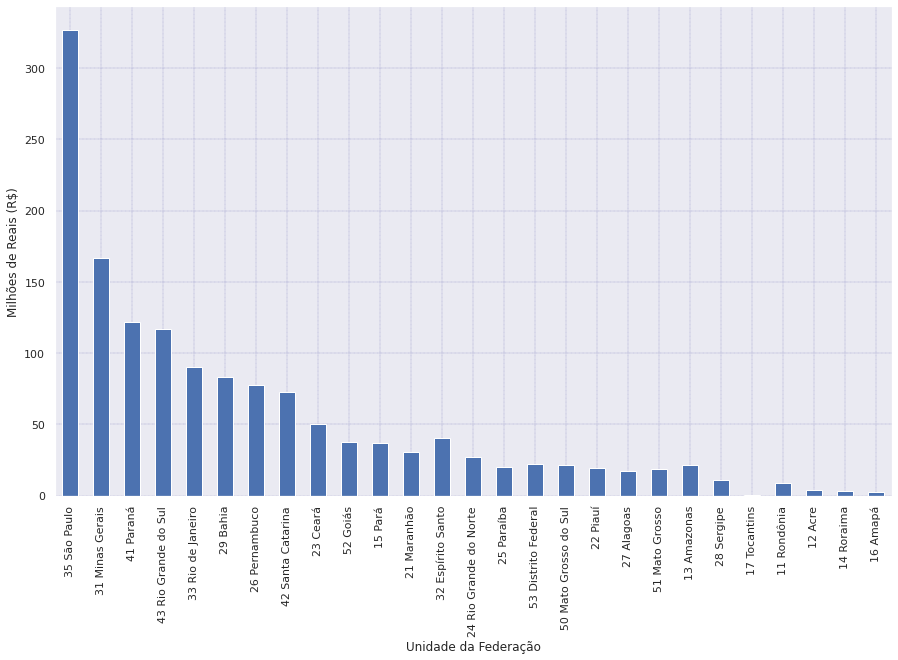

In [17]:
gastos_do_mais_recente.plot(x='Unidade da Federação',y='2020/Dez', ylabel="Milhões de Reais (R$)", kind="bar", figsize=(15,9))
plt.grid(color='navy', linestyle=':', linewidth=0.3)
plt.show()

# mas está ordenado pelo total geral e não pelo total do mês 2020/Dez

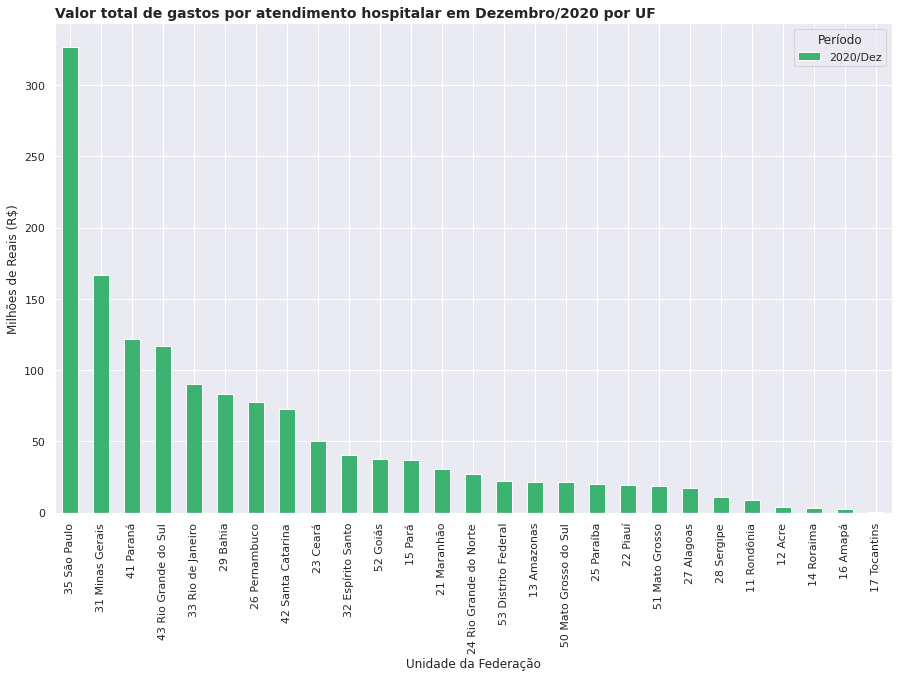

In [18]:
ax = gastos_do_mais_recente.sort_values(ascending=False).plot(x='Unidade da Federação',y='2020/Dez', kind="bar", figsize=(15,9), grid=True, color = 'MediumSeaGreen')
ax.set_title("Valor total de gastos por atendimento hospitalar em Dezembro/2020 por UF", fontsize=14, weight='black', loc='left')
ax.set_xlabel('Unidade da Federação')
ax.set_ylabel('Milhões de Reais (R$)')
plt.legend(bbox_to_anchor=(1,1), title=('Período'))
plt.show()

###**Desafio 02**

Como meu estado é o Paraná e é o 3º no gráfico em gasto, escolho o estado de Santa Catarina.

In [19]:
gastos_do_mais_recente.loc["42 Santa Catarina"]

72.72067511

In [20]:
gastos_do_mais_recente_SC = gastos_do_mais_recente / gastos_do_mais_recente.loc["42 Santa Catarina"]
gastos_do_mais_recente_SC

Unidade da Federação
35 São Paulo             4.49
31 Minas Gerais          2.29
41 Paraná                1.68
43 Rio Grande do Sul     1.61
33 Rio de Janeiro        1.25
29 Bahia                 1.14
26 Pernambuco            1.07
42 Santa Catarina        1.00
23 Ceará                 0.69
52 Goiás                 0.52
15 Pará                  0.51
21 Maranhão              0.43
32 Espírito Santo        0.56
24 Rio Grande do Norte   0.38
25 Paraíba               0.28
53 Distrito Federal      0.31
50 Mato Grosso do Sul    0.29
22 Piauí                 0.27
27 Alagoas               0.24
51 Mato Grosso           0.26
13 Amazonas              0.30
28 Sergipe               0.15
17 Tocantins             0.01
11 Rondônia              0.12
12 Acre                  0.05
14 Roraima               0.04
16 Amapá                 0.04
Name: 2020/Dez, dtype: float64

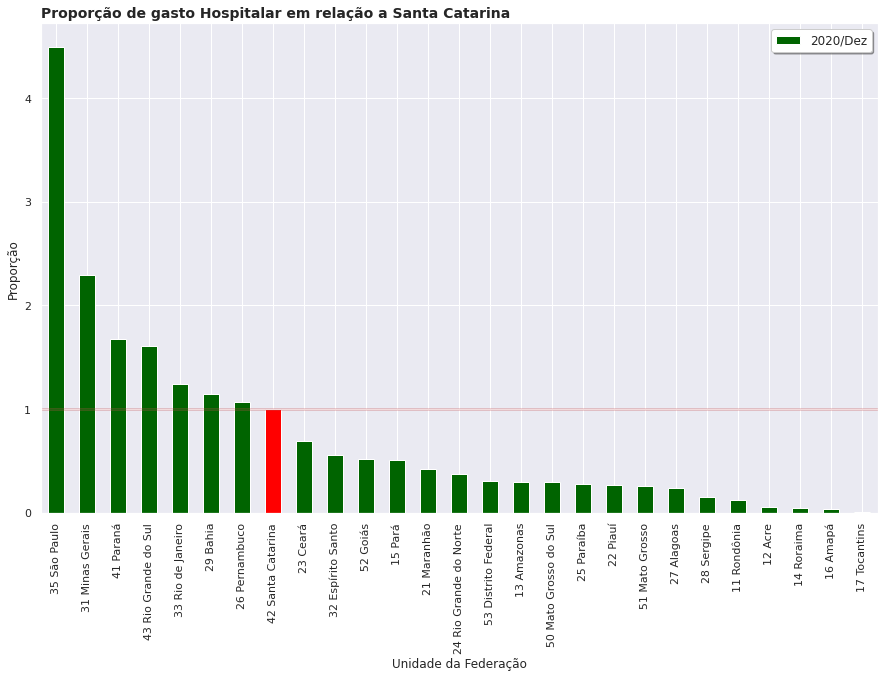

In [21]:
gastos_do_mais_recente_SC_ordenado = gastos_do_mais_recente_SC.sort_values(ascending=False)
idx_SC = gastos_do_mais_recente_SC_ordenado.index.get_loc("42 Santa Catarina")
cores = ["darkgreen"] * gastos_do_mais_recente_SC_ordenado.shape[0]
cores[idx_SC] = 'red'
ax = gastos_do_mais_recente_SC_ordenado.plot(x='Unidade da Federação',y='2020/Dez', kind="bar", figsize=(15,9), grid=True, color=cores)
ax.set_title("Proporção de gasto Hospitalar em relação a Santa Catarina", fontsize=14, weight='black', loc='left')
ax.set_xlabel('Unidade da Federação')
ax.set_ylabel('Proporção')
plt.legend(fontsize='large', frameon=True, facecolor='white', shadow=True)
plt.axhspan(0.99, 1.01, color='r', alpha=0.2)
plt.show()

###**Desafio 03**

Carregar os dados populacionais segundo o TCU disponbilizado nesse [site](https://www.ibge.gov.br/estatisticas/sociais/populacao/9103-estimativas-de-populacao.html?=&t=downloads)


In [22]:
# Dados carregados de um arquivo CSV que foi tratando com base na planilha original
# url_pop='/content/drive/MyDrive/databases/serie_2001_2020_TCU.csv'
# dados_populacao_raw = pd.read_csv(url_pop, engine='python', encoding="ISO-8859-1", sep=";", thousands=".", decimal=",")

---


##**Importando os dados de um arquivo EXCEL**


---

In [23]:
url_pop_xls = '/content/drive/MyDrive/databases/serie_2001_2020_TCU.xls'
dados_excel = pd.read_excel(url_pop_xls, header=4, index_col=0, skipfooter=10, thousands=".")

# Vamos eliminar a linha NaN
dados_populacao = dados_excel.dropna() 

# Padronizar para o tipo Int
dados_populacao = dados_populacao.astype(int)

# padronizar o nome do index da população para o mesmo dos gastos 
mapa = {'Unidades da Federação' : 'Unidade da Federação'}
dados_populacao.rename(columns=mapa, inplace=True)

dados_populacao.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Unidades da Federação,,,,,,,,,,,,,,,,,,,,
Brasil,172385826,174632960,176871437,181581024,184184264,186770562,183989711,189612814,191480630,190747855,192379287,193946886,201032714,202768562,204450649,206081432,207660929,208494900,210147125,211755692
Região Norte,13245084,13504599,13784881,14373260,14698878,15022060,14623317,15142684,15359608,15880839,16095187,16318163,16983484,17231027,17472636,17707783,17936201,18182253,18430980,18672591
Rondônia,1407886,1431777,1455907,1562085,1534594,1562417,1453756,1493566,1503928,1560501,1576455,1590011,1728214,1748531,1768204,1787279,1805788,1757589,1777225,1796460
Acre,574355,586942,600595,630328,669736,686652,655385,680073,691132,732793,746386,758786,776463,790101,803513,816687,829619,869265,881935,894470
Amazonas,2900240,2961801,3031068,3138726,3232330,3311026,3221940,3341096,3393369,3480937,3538387,3590985,3807921,3873743,3938336,4001667,4063614,4080611,4144597,4207714


In [24]:
# Temos linhas totalizadoras por Região do Brasil e uma de todo o Brasil, vou separá-los em outro DataFrame
dados_populacao_totais = dados_populacao.loc[["Brasil","Região Norte","Região Sul","Região Nordeste","Região Sudeste", "Região Centro-Oeste"]]


# Remover as linhas de Totais do DataFrame principal
dados_populacao = dados_populacao.drop(dados_populacao_totais.index)
dados_populacao.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Unidades da Federação,,,,,,,,,,,,,,,,,,,,
Rondônia,1407886,1431777,1455907,1562085,1534594,1562417,1453756,1493566,1503928,1560501,1576455,1590011,1728214,1748531,1768204,1787279,1805788,1757589,1777225,1796460
Acre,574355,586942,600595,630328,669736,686652,655385,680073,691132,732793,746386,758786,776463,790101,803513,816687,829619,869265,881935,894470
Amazonas,2900240,2961801,3031068,3138726,3232330,3311026,3221940,3341096,3393369,3480937,3538387,3590985,3807921,3873743,3938336,4001667,4063614,4080611,4144597,4207714
Roraima,337237,346871,357302,381896,391317,403344,395725,412783,421499,451227,460165,469524,488072,496936,505665,514229,522636,576568,605761,631181
Pará,6341736,6453683,6574993,6850181,6970586,7110465,7065573,7321493,7431020,7603239,7688593,7792561,7969654,8073924,8175113,8272724,8366628,8513497,8602865,8690745


In [25]:
populacao_por_total = dados_populacao.copy()
populacao_por_total['Total'] = populacao_por_total.sum(axis=1)
populacao_por_total = populacao_por_total.sort_values("Total", ascending=False)
# conferência
populacao_por_total

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
Unidades da Federação,,,,,,,,,,,,,,,,,,,,,
São Paulo,37630106,38177742,38709320,39825226,40442795,41055734,39827690,41011635,41384039,41252160,41587182,41901219,43663669,44035304,44396484,44749699,45094866,45538936,45919049,46289333,842492188
Minas Gerais,18127096,18343517,18553312,18993720,19237450,19479356,19273533,19850072,20033665,19595309,19728701,19855332,20593356,20734097,20869101,20997560,21119536,21040662,21168791,21292666,398886832
Rio de Janeiro,14558545,14724475,14879118,15203750,15383407,15561720,15420450,15872362,16010429,15993583,16112678,16231365,16369179,16461173,16550024,16635996,16718956,17159960,17264943,17366189,320478302
Bahia,13214114,13323212,13435612,13682074,13815334,13950146,14080670,14502575,14637364,14021432,14097534,14175341,15044137,15126371,15203934,15276566,15344447,14812617,14873064,14930634,287547178
Rio Grande do Sul,10309819,10408540,10510992,10726063,10845087,10963219,10582887,10855214,10914128,10695532,10733030,10770603,11164043,11207274,11247972,11286500,11322895,11329605,11377239,11422973,218673615
Paraná,9694709,9798006,9906866,10135388,10261856,10387378,10284503,10590169,10686247,10439601,10512349,10577755,10997465,11081692,11163018,11242720,11320892,11348937,11433957,11516840,213380348
Pernambuco,8008207,8084667,8161862,8323911,8413593,8502603,8486638,8734194,8810256,8796032,8864906,8931028,9208550,9277727,9345173,9410336,9473266,9496294,9557071,9616621,177502935
Ceará,7547620,7654535,7758441,7976563,8097276,8217085,8185250,8450527,8547809,8448055,8530155,8606005,8778576,8842791,8904459,8963663,9020460,9075649,9132078,9187103,169924100
Pará,6341736,6453683,6574993,6850181,6970586,7110465,7065573,7321493,7431020,7603239,7688593,7792561,7969654,8073924,8175113,8272724,8366628,8513497,8602865,8690745,151869273


In [26]:
# remover a coluna total para não afetar gráficos e análises
populacao_por_total = populacao_por_total.drop("Total",axis=1)
populacao_por_total.head()

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Unidades da Federação,,,,,,,,,,,,,,,,,,,,
São Paulo,37630106,38177742,38709320,39825226,40442795,41055734,39827690,41011635,41384039,41252160,41587182,41901219,43663669,44035304,44396484,44749699,45094866,45538936,45919049,46289333
Minas Gerais,18127096,18343517,18553312,18993720,19237450,19479356,19273533,19850072,20033665,19595309,19728701,19855332,20593356,20734097,20869101,20997560,21119536,21040662,21168791,21292666
Rio de Janeiro,14558545,14724475,14879118,15203750,15383407,15561720,15420450,15872362,16010429,15993583,16112678,16231365,16369179,16461173,16550024,16635996,16718956,17159960,17264943,17366189
Bahia,13214114,13323212,13435612,13682074,13815334,13950146,14080670,14502575,14637364,14021432,14097534,14175341,15044137,15126371,15203934,15276566,15344447,14812617,14873064,14930634
Rio Grande do Sul,10309819,10408540,10510992,10726063,10845087,10963219,10582887,10855214,10914128,10695532,10733030,10770603,11164043,11207274,11247972,11286500,11322895,11329605,11377239,11422973


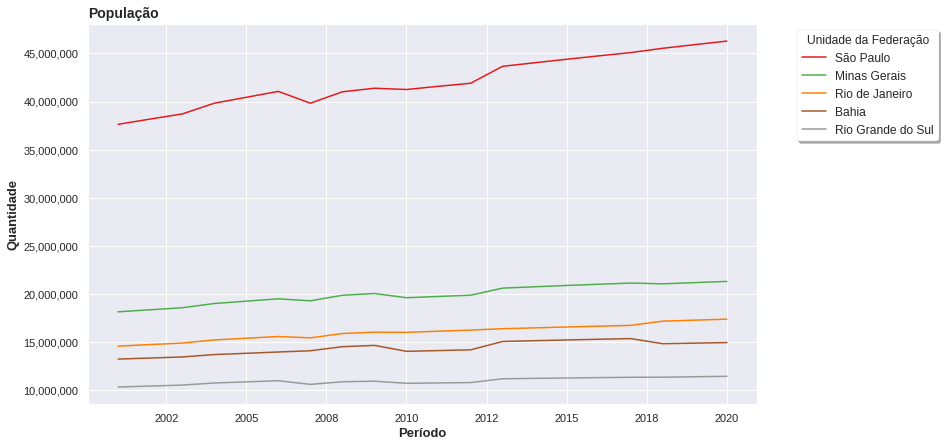

In [27]:
ax = populacao_por_total.head().T.plot(figsize = (12,7), 
                   xlabel=('Ano'),
                   ylabel=('População'),
                   colormap = 'Set1')
plt.style.use('seaborn')
ax.set_title('População', fontsize=14, weight='black', loc='left')
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:.0f}'))
ax.set_xlabel('Período', fontsize=13, weight='black')
ax.set_ylabel('Quantidade', fontsize=13, weight='black')
plt.legend(bbox_to_anchor=(1.05, 1), title='Unidade da Federação', fontsize='large', frameon=True, facecolor='white', shadow=True)
# plt.ylim(0, 50)
plt.show()

In [28]:
ordenado_por_total_UF = ordenado_por_total.copy()
ordenado_por_total_UF.index = ordenado_por_total_UF.index.str[3:]
ordenado_por_total_UF.head()

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
São Paulo,172961999.58,170556696.16,170338163.23,172462057.87,175492995.85,179569910.06,180005050.15,180151656.17,191859884.40,190927266.19,177093923.51,192412059.08,178641284.75,217011730.99,215128107.89,212905217.48,212715455.71,214079357.56,215265625.54,214249871.52,216117145.69,209183971.87,192157037.74,213512793.72,195787926.41,239411372.83,221202929.85,231922777.54,224043808.74,224157730.03,248761855.09,224121038.86,239354185.52,225639053.93,210710879.63,229146880.12,221660000.41,241445575.82,229920625.55,250817406.39,...,259637865.62,279651701.80,254219071.83,285347367.95,286371908.91,291679087.16,279102175.09,286151216.15,295669082.46,277685593.12,302766551.12,278268419.72,266770321.19,291893655.29,268083525.99,287154994.64,292870544.04,309140915.40,281621767.01,307195118.45,303584114.00,294084067.68,303866355.88,282791833.07,273357491.41,303865927.27,272050698.90,277938674.53,255178741.12,314276263.03,328293581.02,361986896.25,350268671.25,338872478.49,328055822.63,324599773.40,326846228.95,324115425.70,268193064.06,177408317.71
Minas Gerais,70301089.50,79119005.51,79046322.41,79268070.12,79619189.20,82209206.98,80374117.08,82409129.30,88613476.60,84486996.11,88928630.30,99018155.84,83675119.83,100258616.86,91831325.37,97289703.07,95723396.53,100050008.70,98977184.26,98202119.08,96962394.27,94767639.13,92412770.73,95806556.42,90764890.28,107389850.03,100835953.45,105494550.31,99666115.96,103365357.52,107844259.69,104341138.19,100525403.88,101943625.50,99538953.60,107766131.57,103149387.49,111077091.84,106094329.28,115487199.35,...,138366640.55,146510600.58,130734031.29,151506781.86,150702572.27,153604880.55,150262499.13,156721912.31,160484918.69,145998611.06,157294586.62,148172783.99,145422406.28,153236422.57,142690772.52,151976196.81,157957866.20,163641094.76,154174153.49,166775913.85,161774658.77,157437833.94,166165125.18,152171503.07,152473281.15,158265777.55,141463360.42,147654942.70,127447290.37,142746287.34,157276616.50,177466638.10,182176122.99,181422500.43,174585638.28,168564708.16,166376967.67,155064483.25,119877417.15,79780838.00
Paraná,48855046.46,55611791.07,56115135.82,55574831.93,56094754.74,59802402.07,56699001.13,58091985.79,61365941.22,59667208.62,57816197.74,60381593.99,57239101.63,69070488.20,64054678.26,68685542.95,67931227.06,70958762.64,69225783.96,67849968.52,68558209.28,67158496.97,63094274.28,66902643.63,64501133.64,77138870.60,70755396.99,73456756.71,71839020.89,73013830.77,76151006.95,74240963.45,73042386.70,76364750.27,70517638.39,74712784.07,71314740.25,76914668.09,74232937.37,81709021.05,...,105558123.29,116133193.49,107075982.24,122331354.51,124731345.17,127083090.02,122616924.02,127991900.80,131257163.40,120647377.43,129530163.96,121810669.26,112984630.73,124159239.68,117715473.32,123907372.22,127464502.39,132608039.80,124865873.14,134708659.18,127174381.95,126203976.57,133870601.68,126221140.81,113573832.72,122330101.96,116125740.39,114776571.27,97784060.57,111012770.38,115203716.64,123856640.55,125089468.62,121771167.11,127506086.52,133443307.36,122146256.92,106948897.53,83130175.37,43480729.07
Rio Grande do Sul,45897704.82,52928695.92,51972416.77,51679350.79,53759674.01,56

In [29]:
valor_total_gasto_por_ano_zerado = populacao_por_total.copy()
for idx in valor_total_gasto_por_ano_zerado.index:
    for colname in valor_total_gasto_por_ano_zerado.columns:
        valor_total_gasto_por_ano_zerado[colname][idx] = 0

valor_total_gasto_por_ano = valor_total_gasto_por_ano_zerado.copy()

# Como o valor dos gastos é a partir de 2008, vamos retirar as colunas anteriores
valor_total_gasto_por_ano = valor_total_gasto_por_ano_zerado.iloc[:,7:]

# forçando o tipo float64
valor_total_gasto_por_ano = valor_total_gasto_por_ano.astype(float)

# valor_total_gasto_por_ano (tudo zerado)

In [30]:
# somar os gastos por Ano que estão por Ano/Mês 
for idx in ordenado_por_total_UF.index:
    for colname in ordenado_por_total_UF.columns:
        coluna_ano = int(colname[:4])
        if coluna_ano >= 2008 and coluna_ano < 2021:
           valor_total_gasto_por_ano[coluna_ano][idx] = valor_total_gasto_por_ano[coluna_ano][idx] + ordenado_por_total_UF[colname][idx]

valor_total_gasto_por_ano

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Unidades da Federação,,,,,,,,,,,,,
São Paulo,1961419603.17,2489866865.82,2698626352.15,2795608209.33,2875724729.28,3065128868.48,3202643071.94,3189500991.32,3202235594.59,3304056356.64,3383682496.50,3495644382.86,3782233756.84
Minas Gerais,894375233.11,1149168433.67,1217516654.83,1315077772.94,1408435144.27,1514954836.43,1646320656.38,1660880705.39,1640081063.94,1728114903.68,1797416584.63,1880474822.31,1925446850.51
Rio de Janeiro,479253893.90,607673488.14,659884038.66,677243523.63,669873356.47,750468688.36,751718629.32,795014721.12,791254283.19,835569669.54,895332750.92,952919836.74,997022179.78
Bahia,469024606.17,587257587.34,610265834.08,658599511.97,679342404.10,711401896.93,756215565.87,775620634.85,812721114.98,829155082.06,848504165.18,883280835.61,921710972.14
Rio Grande do Sul,599628207.73,762244197.64,795981169.92,823431201.21,868787983.43,969685876.62,1031223758.12,1049961898.43,1044518675.97,1063151492.82,1083396471.19,1129914316.91,1207233297.69
Paraná,625694296.59,794208127.74,867924398.99,909208171.14,950792578.31,1031014006.63,1063811304.96,1117806487.23,1230234063.85,1344766463.19,1464193795.03,1512473093.46,1431045888.29
Pernambuco,333103818.93,443702553.69,500363276.68,502285559.55,538816431.44,638826489.00,701862687.78,714424490.12,722598728.54,780449930.30,797461118.92,819485595.83,829650191.64
Ceará,332222553.08,400766526.19,409303693.29,428366238.78,428771295.34,481763409.68,516364610.08,524007844.29,538651803.27,554397629.35,580547781.70,617588829.25,636800080.91
Pará,253273619.39,318534381.79,323475434.21,325157580.12,314077253.65,338360847.83,348668600.11,350527947.62,363094303.10,388200710.98,412284321.03,408031941.25,448764859.15


In [31]:
valor_gasto_per_capita = valor_total_gasto_por_ano.copy()

for idx in valor_total_gasto_por_ano.index:
    for colname in valor_total_gasto_por_ano.columns:
        valor_gasto_per_capita[colname][idx] = valor_total_gasto_por_ano[colname][idx] / populacao_por_total[colname][idx]

valor_gasto_per_capita

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Unidades da Federação,,,,,,,,,,,,,
São Paulo,47.83,60.16,65.42,67.22,68.63,70.20,72.73,71.84,71.56,73.27,74.30,76.13,81.71
Minas Gerais,45.06,57.36,62.13,66.66,70.93,73.57,79.40,79.59,78.11,81.83,85.43,88.83,90.43
Rio de Janeiro,30.19,37.95,41.26,42.03,41.27,45.85,45.67,48.04,47.56,49.98,52.18,55.19,57.41
Bahia,32.34,40.12,43.52,46.72,47.92,47.29,49.99,51.01,53.20,54.04,57.28,59.39,61.73
Rio Grande do Sul,55.24,69.84,74.42,76.72,80.66,86.86,92.01,93.35,92.55,93.89,95.63,99.31,105.68
Paraná,59.08,74.32,83.14,86.49,89.89,93.75,96.00,100.13,109.42,118.79,129.02,132.28,124.26
Pernambuco,38.14,50.36,56.89,56.66,60.33,69.37,75.65,76.45,76.79,82.38,83.98,85.75,86.27
Ceará,39.31,46.89,48.45,50.22,49.82,54.88,58.39,58.85,60.09,61.46,63.97,67.63,69.31
Pará,34.59,42.87,42.54,42.29,40.30,42.46,43.18,42.88,43.89,46.40,48.43,47.43,51.64


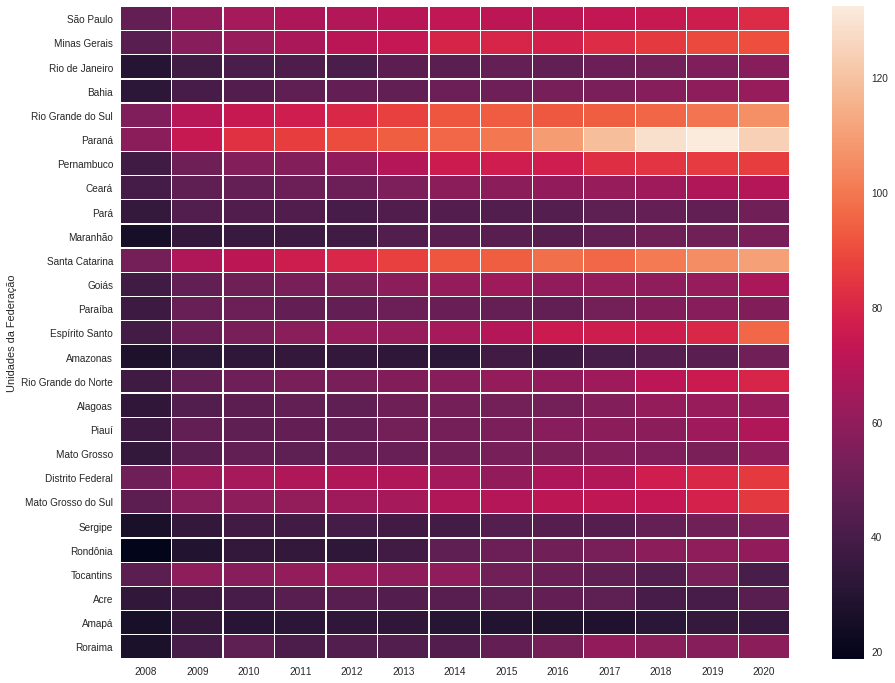

In [36]:
plt.subplots(figsize=(15, 12))
sns.heatmap(valor_gasto_per_capita, linewidths=.25)
plt.show()

###Percebemos que no estado do Paraná há um aumento no custo per capita.
###Percebemos também um aumento anual no custo per capita, exceto no Amapá, que o custo fica entre $20,00$ e $40,00$ por vários anos. 